In [1]:
print("hello world")

hello world


Okay so we have to write a custom dataset class no biggie, but the project description says to focus on silence and unknown but there is no such labels 

I guess for unknown you can make argument that special words like marvin, sheila, happy can serve as unknown but not sure about silence.

Okay case closed we are supposed to create it ourselves based on background_noise_ directory 

Goal for this notebook is to prepare data. I'm assuming that in /data
directory should be extracted contents of train archive:

- `audio` directory 
- testing_list.txt
- validation_list.txt

I'm gonna create three directories in /data

- `train`
- `test`
- `validation`

im gonna add new class to each: silence

In [52]:
from pathlib import Path
from typing import Tuple

import torch
from torch.utils.data import Dataset, DataLoader
import torchaudio

import numpy as np
import matplotlib.pyplot as plt

In [53]:
class SpeechCommandsDataset(Dataset):
    def __init__(self, root_dir: str, transform=None):
        self.root_dir = Path(root_dir)
        self.transform = transform

        # Get all .wav file paths and corresponding labels
        self.samples = []
        self.labels = sorted({p.name for p in self.root_dir.iterdir() if p.is_dir()})
        self.label_to_index = {label: idx for idx, label in enumerate(self.labels)}

        for label in self.labels:
            label_dir = self.root_dir / label
            for wav_file in label_dir.glob("**/*.wav"):
                self.samples.append((wav_file, self.label_to_index[label]))

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx) -> Tuple[torch.Tensor, int]:
        audio_path, label = self.samples[idx]
        waveform, sample_rate = torchaudio.load(audio_path)

        # Optional transformation (e.g., resample, MFCC, etc.)
        if self.transform:
            waveform = self.transform(waveform)

        return waveform, label

In [54]:
def collate_fn(batch):
    waveforms, labels = zip(*batch)
    return list(waveforms), torch.tensor(labels)

In [55]:
train_dataset = SpeechCommandsDataset("./../../data/train")

train_loader = DataLoader(
    train_dataset, batch_size=40, shuffle=True, collate_fn=collate_fn
)

# Example: get a batch
for batch in train_loader:
    waveforms, labels = batch
    for i, waveform in enumerate(waveforms):
        print(
            f"  Waveform {i} shape: {waveform.shape}"
        )  # (batch_size, channels, samples)
    print(labels)
    break

  Waveform 0 shape: torch.Size([1, 16000])
  Waveform 1 shape: torch.Size([1, 16000])
  Waveform 2 shape: torch.Size([1, 16000])
  Waveform 3 shape: torch.Size([1, 16000])
  Waveform 4 shape: torch.Size([1, 16000])
  Waveform 5 shape: torch.Size([1, 16000])
  Waveform 6 shape: torch.Size([1, 16000])
  Waveform 7 shape: torch.Size([1, 16000])
  Waveform 8 shape: torch.Size([1, 14861])
  Waveform 9 shape: torch.Size([1, 16000])
  Waveform 10 shape: torch.Size([1, 16000])
  Waveform 11 shape: torch.Size([1, 16000])
  Waveform 12 shape: torch.Size([1, 14861])
  Waveform 13 shape: torch.Size([1, 16000])
  Waveform 14 shape: torch.Size([1, 16000])
  Waveform 15 shape: torch.Size([1, 16000])
  Waveform 16 shape: torch.Size([1, 15702])
  Waveform 17 shape: torch.Size([1, 16000])
  Waveform 18 shape: torch.Size([1, 16000])
  Waveform 19 shape: torch.Size([1, 16000])
  Waveform 20 shape: torch.Size([1, 16000])
  Waveform 21 shape: torch.Size([1, 16000])
  Waveform 22 shape: torch.Size([1, 16000]

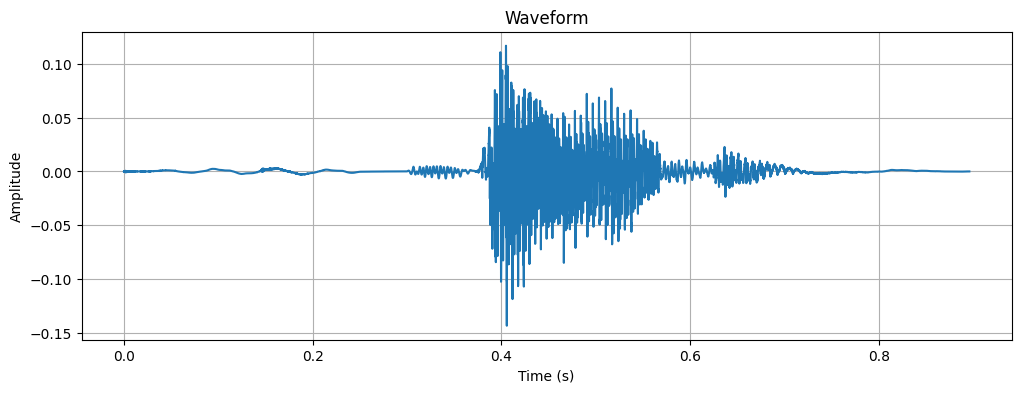

In [56]:
waveform, sample_rate = torchaudio.load("./../../data/test/bed/fa446c16_nohash_1.wav")
signal = waveform[0].numpy()
time_axis = np.linspace(0, len(signal) / sample_rate, num=len(signal))

plt.figure(figsize=(12, 4))
plt.plot(time_axis, signal)
plt.title("Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()